**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Project - Text Minning</center>
        </span>
    </font>
</h2>

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
        </span>
    </font>
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
# For numpy Arrays 
import numpy as np

# For using pandas DataFrame
import pandas as pd

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting in the current window
%matplotlib inline

# To supress future warnings
import warnings
warnings.filterwarnings("ignore")

# For scaling using zscore
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

## -------------------------------------------

# Natural language tool kit(nltk) library for applying in statistical natural language processing (NLP)
import nltk

import string

# Word Clouds are used for visual displays of text data.
from wordcloud import WordCloud

from nltk.corpus import stopwords

# For stemming the standard words example removing “ing”, “ly”, and “s” but not as it is done using PorterStemmer()
from nltk.stem import WordNetLemmatizer

from nltk import word_tokenize, sent_tokenize

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
# nltk.download('wordnet')

In [4]:
# nltk.download('omw-1.4')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format

Problem 2: Text Minning
====================
A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks. 
You will ONLY use “Description” column for the initial text mining exercise. 
 1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame. 
 2. Create two corpus, one with those who secured a Deal, the other with those who did not secure a deal. 
 3. The following exercise is to be done for both the corpus: 
     a) Find the number of characters for both the corpuses. 
     b) Remove Stop Words from the corpus. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed) 
     c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)? 
     d) Plot the Word Cloud for both the corpuses. 
 4. Refer to both the word clouds. What do you infer? 
 5. Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

In [4]:
df = pd.read_csv('SharkTankCompanies.csv')

In [5]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two retail locations in New Jersey.,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled parents of young children everywhere. This talking medicine dispenser makes it easy to administer medicine to little ones by turning the experience more playful and by providing positive reinforcement.,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services delivered by college women.",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiting rooms offering patients web access and educational information.,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [6]:
df.tail()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
490,True,"Zoom Interiors is a virtual service for interior design that delivers personalized style at accessible price points. Users fill out a survey to give Zoom a sense for their style, then follow on with a free 15-minute telephone consultation. For just $150, customers can get a room designed with budgets starting as low as $1,000.",28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie Grover","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,"Spikeball started out as a casual outdoors game, but has grown to become a national sensation. Played in a 2 vs. 2 format, teams compete to spike a ball into a bouncy net until one team can't return it, which awards their opposing team a point. This nascent sport is often described as a cross between beach volleyball and foursquare. Spikeball's popularity has been growing, and currently there are over a quarter million players in the United States, as well as over a thousand nationally ranked teams.",29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,"Shark Wheel is out to literally reinvent the wheel. Their innovative wheel design is not circular, it's Q-shaped, to put it as simply as possible. This shape may look funny, but it makes wheels faster and gives them better grip. Over uneven terrain, it also makes for a smoother ride. The team has put Shark Wheel on skateboards, strollers, wagons, and they see countless other possibilities for it. The flagship product currently in production is the skateboard wheels, which have been selling online.",29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,"Adriana Montano wants to open the first Cat Cafe in Florida. At a cafe such as this one, patrons pay an admission fee ($9 in this case) to come in and play with the kitties, maybe while sipping a coffee or enjoying a book. All the cats at the Cafe will be up for adoption, so this becomes a way for people without pets to enjoy their company and provides another channel to help rescue cats get adopted and find forever homes.",29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False
494,True,"Sway Motorsports makes a three-wheeled, all-electric, street legal ride. It's not like other motorcycles or scooters on the market because its control mechanism. Affording riders a slightly wider footprint and the ability to control the tilt of the vehicle with their legs, Sway vehicles offer greater stability and tighter turns. Riders don't have to struggle to balance the vehicle or put their foot down at stops, and for the same reason, it's also easier to carry a passenger or baggage on Sway vehicles.",29,Automotive,Joe Wilcox,"Palo Alto, CA",http://www.swaymotorsports.com,300000,10,3000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Sway Motorsports,6-29,False


### 2.1 Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.

In [7]:
modified_df = df[['deal','description']]

In [8]:
modified_df.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two retail locations in New Jersey.
2,True,Ava the Elephant is a godsend for frazzled parents of young children everywhere. This talking medicine dispenser makes it easy to administer medicine to little ones by turning the experience more playful and by providing positive reinforcement.
3,False,"Organizing, packing, and moving services delivered by college women."
4,False,Interactive media centers for healthcare waiting rooms offering patients web access and educational information.


In [9]:
modified_df.tail()

,deal,description
490,True,"Zoom Interiors is a virtual service for interior design that delivers personalized style at accessible price points. Users fill out a survey to give Zoom a sense for their style, then follow on with a free 15-minute telephone consultation. For just $150, customers can get a room designed with budgets starting as low as $1,000."
491,True,"Spikeball started out as a casual outdoors game, but has grown to become a national sensation. Played in a 2 vs. 2 format, teams compete to spike a ball into a bouncy net until one team can't return it, which awards their opposing team a point. This nascent sport is often described as a cross between beach volleyball and foursquare. Spikeball's popularity has been growing, and currently there are over a quarter million players in the United States, as well as over a thousand nationally ranked teams."
492,True,"Shark Wheel is out to literally reinvent the wheel. Their innovative wheel design is not circular, it's Q-shaped, to put it as simply as possible. This shape may look funny, but it makes wheels faster and gives them better grip. Over uneven terrain, it also makes for a smoother ride. The team has put Shark Wheel on skateboards, strollers, wagons, and they see countless other possibilities for it. The flagship product currently in production is the skateboard wheels, which have been selling online."
493,False,"Adriana Montano wants to open the first Cat Cafe in Florida. At a cafe such as this one, patrons pay an admission fee ($9 in this case) to come in and play with the kitties, maybe while sipping a coffee or enjoying a book. All the cats at the Cafe will be up for adoption, so this becomes a way for people without pets to enjoy their company and provides another channel to help rescue cats get adopted and find forever homes."
494,True,"Sway Motorsports makes a three-wheeled, all-electric, street legal ride. It's not like other motorcycles or scooters on the market because its control mechanism. Affording riders a slightly wider footprint and the ability to control the tilt of the vehicle with their legs, Sway vehicles offer greater stability and tighter turns. Riders don't have to struggle to balance the vehicle or put their foot down at stops, and for the same reason, it's also easier to carry a passenger or baggage on Sway vehicles."


### 2.2 Create two corpus, one with those who secured a Deal, the other with those who did not secure a deal.

In [10]:
deal_corpus = modified_df[modified_df['deal']==True].reset_index(drop=True)
deal_corpus.head()

,deal,description
0,True,Retail and wholesale pie factory with two retail locations in New Jersey.
1,True,Ava the Elephant is a godsend for frazzled parents of young children everywhere. This talking medicine dispenser makes it easy to administer medicine to little ones by turning the experience more playful and by providing positive reinforcement.
2,True,"One of the first entrepreneurs to pitch on Shark Tank, Susan Knapp presented A Perfect Pear, her line of pear-focused gourmet food products. Sold across 650 retail stores, the Perfect Pear product portfolio includes jams, jellies, spreads, tapenades, vinegars, marinades, dressings and many others, all designed to showcase the flavors and health benefits of pears."
3,True,An educational record label and publishing house designed to get students into learning about classic works of literature.
4,True,"A battery-operated cooking device that siphons juice, has a silicone basting brush and an injector tip for marinades."


In [11]:
nodeal_corpus = modified_df[modified_df['deal']==False].reset_index(drop=True)
nodeal_corpus.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,False,"Organizing, packing, and moving services delivered by college women."
2,False,Interactive media centers for healthcare waiting rooms offering patients web access and educational information.
3,False,A mixed martial arts clothing line looking to become the next big brand of active sports / streetwear apparel.
4,False,"Attach Noted is a detachable ""arm"" that holds Post-It notes on the side of a laptop screen."


### 2.3 The following exercise is to be done for both the corpus: 
 - Find the number of characters for both the corpuses. 
 - Remove Stop Words from the corpus. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed) 
 - What were the top 3 most frequently occurring words in both corpuses (after removing stop words)? 
 - Plot the Word Cloud for both the corpuses

### 2.3.1 Find the number of characters for both the corpuses

In [12]:
''.join(deal_corpus['description'][5]).split()

['A',
 'line',
 'of',
 'books',
 'written',
 'to',
 'help',
 'children',
 'find',
 'inner',
 'calm.']

In [14]:
len(word_tokenize(deal_corpus['description'][5]))

12

In [15]:
len(''.join(deal_corpus['description'][5]).split()) ## Count of Words

11

In [16]:
len(' '.join(deal_corpus['description'][5]).split()) ## Count of Characters

47

In [17]:
deal_word_total = 0
deal_character_total = 0
nondeal_word_total = 0
nondeal_character_total = 0
for i in range(0, len(deal_corpus['description'])):
    deal_word_total = deal_word_total + len(word_tokenize(deal_corpus['description'][i])) ## Count of Words
    deal_character_total = deal_character_total + len(' '.join(deal_corpus['description'][i]).split()) ## Count of Characters

for i in range(0, len(nodeal_corpus['description'])):
    nondeal_word_total = nondeal_word_total + len(word_tokenize(deal_corpus['description'][i])) ## Count of Words
    nondeal_character_total = nondeal_character_total + len(' '.join(nodeal_corpus['description'][i]).split()) ## Count of Characters
    

print('Total number of characters in the Corpus who secured Deal is -',deal_character_total)
print('Total number of characters in the Corpus who didnot secured a Deal is -',nondeal_character_total)
print('Total number of words in the Corpus who secured Deal is -',deal_word_total)
print('Total number of words in the Corpus who didnot secured a Deal is -',nondeal_word_total)

Total number of characters in the Corpus who secured Deal is - 53910
Total number of characters in the Corpus who didnot secured a Deal is - 39697
Total number of words in the Corpus who secured Deal is - 11798
Total number of words in the Corpus who didnot secured a Deal is - 11242


In [16]:
deal_word_total = 0
deal_character_total = 0
nondeal_word_total = 0
nondeal_character_total = 0
for i in range(0, len(deal_corpus['description'])):
    deal_word_total = deal_word_total + len(''.join(deal_corpus['description'][i]).split()) ## Count of Words
    deal_character_total = deal_character_total + len(' '.join(deal_corpus['description'][i]).split()) ## Count of Characters

for i in range(0, len(nodeal_corpus['description'])):
    nondeal_word_total = nondeal_word_total + len(''.join(nodeal_corpus['description'][i]).split()) ## Count of Words
    nondeal_character_total = nondeal_character_total + len(' '.join(nodeal_corpus['description'][i]).split()) ## Count of Characters
    

print('Total number of characters in the Corpus who secured Deal is -',deal_character_total)
print('Total number of characters in the Corpus who didnot secured a Deal is -',nondeal_character_total)
print('Total number of words in the Corpus who secured Deal is -',deal_word_total)
print('Total number of words in the Corpus who didnot secured a Deal is -',nondeal_word_total)

Total number of characters in the Corpus who secured Deal is - 53910
Total number of characters in the Corpus who didnot secured a Deal is - 39697
Total number of words in the Corpus who secured Deal is - 10399
Total number of words in the Corpus who didnot secured a Deal is - 7727


- Total number of characters in the Corpus who secured Deal is - 53910
- Total number of characters in the Corpus who didnot secured a Deal is - 39697
- Total number of words in the Corpus who secured Deal is - 10399
- Total number of words in the Corpus who didnot secured a Deal is - 7727

### 2.3.2 Remove Stop Words from the corpus. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)

In [17]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and 
# the english stopwords from nltk
stop = stopwords.words('english') + list(string.punctuation)
stop.extend(["also","made","makes","make","like","this","even","company"])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
deal_corpus['description'] = deal_corpus['description'].str.lower()
deal_corpus['description'].head()

0                                                                                                                                                                                                                                                                                                        retail and wholesale pie factory with two retail locations in new jersey.
1                                                                                                                             ava the elephant is a godsend for frazzled parents of young children everywhere. this talking medicine dispenser makes it easy to administer medicine to little ones by turning the experience more playful and by providing positive reinforcement.
2    one of the first entrepreneurs to pitch on shark tank, susan knapp presented a perfect pear, her line of pear-focused gourmet food products. sold across 650 retail stores, the perfect pear product portfolio includes jams, jellies, spreads, tapenades, vi

In [19]:
nodeal_corpus['description'] = nodeal_corpus['description'].str.lower()
nodeal_corpus['description'].head()

0                                                                              bluetooth device implant for your ear.
1                                                organizing, packing, and moving services delivered by college women.
2    interactive media centers for healthcare waiting rooms offering patients web access and educational information.
3      a mixed martial arts clothing line looking to become the next big brand of active sports / streetwear apparel.
4                         attach noted is a detachable "arm" that holds post-it notes on the side of a laptop screen.
Name: description, dtype: object

**Removal of StopWords**

In [20]:
deal_corpus['description'] = deal_corpus['description'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
deal_corpus['description'].head()

0                                                                                                                                                                                                                                                                    retail wholesale pie factory two retail locations new jersey.
1                                                                                                                                    ava elephant godsend frazzled parents young children everywhere. talking medicine dispenser easy administer medicine little ones turning experience playful providing positive reinforcement.
2    one first entrepreneurs pitch shark tank, susan knapp presented perfect pear, line pear-focused gourmet food products. sold across 650 retail stores, perfect pear product portfolio includes jams, jellies, spreads, tapenades, vinegars, marinades, dressings many others, designed showcase flavors health benefits pears.
3                              

In [21]:
nodeal_corpus['description'] = nodeal_corpus['description'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
nodeal_corpus['description'].head()

0                                                                               bluetooth device implant ear.
1                                               organizing, packing, moving services delivered college women.
2    interactive media centers healthcare waiting rooms offering patients web access educational information.
3            mixed martial arts clothing line looking become next big brand active sports streetwear apparel.
4                                       attach noted detachable "arm" holds post-it notes side laptop screen.
Name: description, dtype: object

**Removal of Punctuation**

In [22]:
deal_corpus['description'] = deal_corpus['description'].str.replace('[^a-z\s]','')
deal_corpus['description'].head()

0                                                                                                                                                                                                                                                     retail wholesale pie factory two retail locations new jersey
1                                                                                                                      ava elephant godsend frazzled parents young children everywhere talking medicine dispenser easy administer medicine little ones turning experience playful providing positive reinforcement
2    one first entrepreneurs pitch shark tank susan knapp presented perfect pear line pearfocused gourmet food products sold across  retail stores perfect pear product portfolio includes jams jellies spreads tapenades vinegars marinades dressings many others designed showcase flavors health benefits pears
3                                                                              

In [23]:
nodeal_corpus['description'] = nodeal_corpus['description'].str.replace('[^a-z\s]','')
nodeal_corpus['description'].head()

0                                                                               bluetooth device implant ear
1                                                 organizing packing moving services delivered college women
2    interactive media centers healthcare waiting rooms offering patients web access educational information
3            mixed martial arts clothing line looking become next big brand active sports streetwear apparel
4                                          attach noted detachable arm holds postit notes side laptop screen
Name: description, dtype: object

**Using WordNetLemmatizer**

In [24]:
lmtzr = WordNetLemmatizer()
nodeal_corpus['description'] = nodeal_corpus['description'].apply(lambda x: " ".join(lmtzr.lemmatize(x) for x in x.split()))
nodeal_corpus['description'].head(10)

0                                                                                                                                                                                                                                                            bluetooth device implant ear
1                                                                                                                                                                                                                               organizing packing moving service delivered college woman
2                                                                                                                                                                                   interactive medium center healthcare waiting room offering patient web access educational information
3                                                                                                                                                         

In [25]:
deal_corpus['description'] = deal_corpus['description'].apply(lambda x: " ".join(lmtzr.lemmatize(x) for x in x.split()))
deal_corpus['description'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                        retail wholesale pie factory two retail location new jersey
1                                                                                                                                                                                                                                                                                                                             ava elephant godsend frazzled parent young child everywhere talking medicine dispenser easy administer medicine little one turning experience playful providing positive reinforcemen

### 2.3.3  What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?

In [26]:
deal_corpus_freq = pd.Series(' '.join(deal_corpus['description']).split()).value_counts()[:10]
deal_corpus_freq

product     34
design      22
line        20
child       20
designed    19
way         18
easy        18
keep        18
without     18
offer       18
dtype: int64

In [27]:
nodeal_corpus_freq = pd.Series(' '.join(nodeal_corpus['description']).split()).value_counts()[:10]
nodeal_corpus_freq

product     28
help        20
device      17
water       17
use         17
system      16
service     16
designed    15
online      15
without     14
dtype: int64

**After removal of stop words, punctuation ,custom stopwords and after applying WordNetLemmatizer on the text, the top three words that are noticed is given below:**

 - The top three words that occurs the most number of times when a deal was Secured are - "product", "design", "line","child"
 - The top three words that occurs the most number of times when no deal was Secured are - "product", "help", "water", "device"

### 2.3.4 Plot the word cloud for the corpus - for those who secured a Deal, the other for those who did not secure a deal(after removing the stopwords)

Word Cloud when Deal was Secured (after cleaning)!!


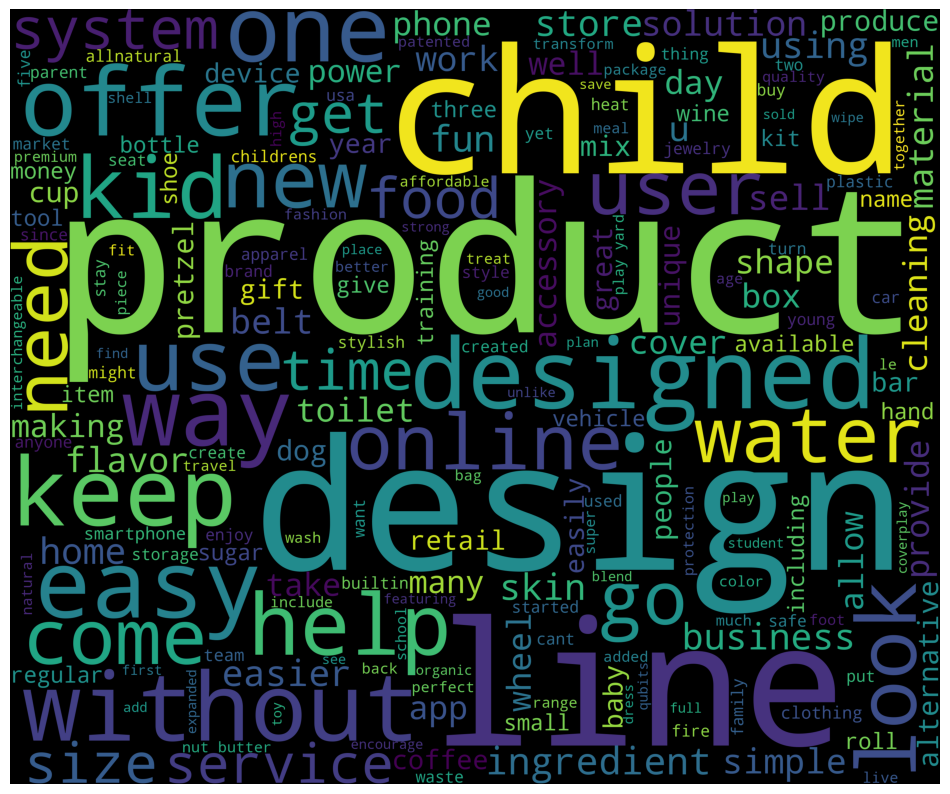

In [28]:
words = ' '.join(deal_corpus['description'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
            
                            ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud when Deal was Secured (after cleaning)!!")
plt.show()

Word Cloud when Deal was not Secured (after cleaning)!!


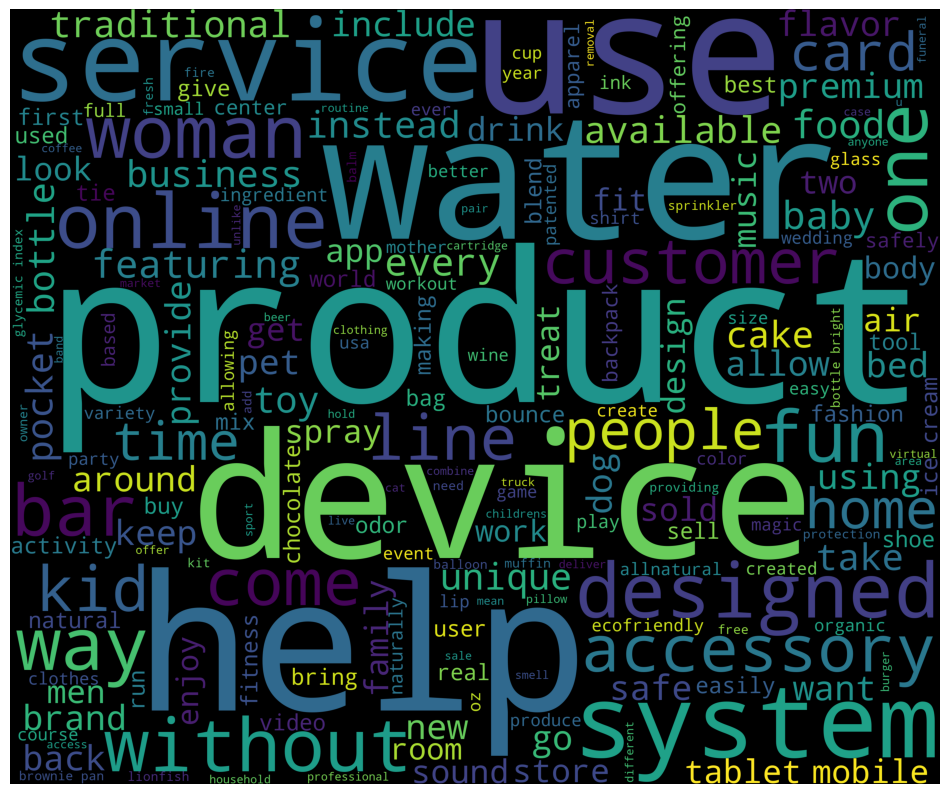

In [29]:
words = ' '.join(nodeal_corpus['description'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
            
                            ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud when Deal was not Secured (after cleaning)!!")
plt.show()

### 2.4 Refer to both the word clouds. What do you infer?

- In Word Cloud, the bigger and bolder the word appears the more often it is mentioned within a given text and the more important it is.
- In the Word Cloud for those who secured a Deal, the most important words are the most frequently occuring words in the texts and are represented with largest fonts such as - product, design, line, child, designed, without, way, easy, keep, and offer.
- These words could have influenced or helped to increase the likelihood to secure a deal in the shark tank.
- In the Word Cloud for those who didnot secured a Deal, the most important words are the most frequently occuring words in the texts and are represented with largest fonts such as - product, help, water, device, use, system, service, online, designed and one
- These words didnot help to increase the likelihood to secure the deal as these words were not perceived positevly by the judges of the contest to grab such deals.
- There are some words which are common to both the word clouds. For example - product and designed. Such words are quite neutral and doesn't provide any clear indication about the sentiments of the decision taken. Sometime these words are generic words and can be ommitted from the WordCloud. We can also get rid fo such words from the WordCloud.

### 2.5 Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

- The word "device" has smaller font size in WordCloud for those who secured a Deal than that in WordCloud for those who didn't secured a Deal. 
- The word "device" is much larger and clearly visible in the WordCloud for those who didn't secured a Deal whereas the word "device" is smaller and hard to find in the WordCloud for those who secured a Deal. 
- The larger font size in the WordCloud indicates that the words have been used more frequently and the smaller font size indicates that the words are less frequently used in the texts.

- It indicates that the word "device" occurred frequently whenever a deal was rejected. This supports the statement that the enterpreneurs who introduced devices are less likely to secure a deal.